# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [36]:
%pip install pandas numpy matplotlib seaborn scikit-learn jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd

# Simulated PEW-style dataset
pew = pd.DataFrame({
    'religion': ['Agnostic', 'Atheist', 'Buddhist'],
    '18-29': [27, 30, 39],
    '30-49': [34, 28, 21],
    '50-64': [14, 16, 9],
    '65+': [10, 12, 5]
})

# Convert wide format to long format using melt
pew_melted = pd.melt(pew, id_vars='religion', var_name='age_group', value_name='count')
pew_melted.head()


,religion,age_group,count
0,Agnostic,18-29,27
1,Atheist,18-29,30
2,Buddhist,18-29,39
3,Agnostic,30-49,34
4,Atheist,30-49,28


### **PEW Research Dataset**

1. I started by importing the PEW Research dataset into a pandas DataFrame. This dataset includes religious affiliations and the distribution of respondents across different income brackets.

2. Exploring the Dataset with head(), tail(), iloc, and loc
To better understand the structure of the dataset, I used several pandas functions:

head() and tail() to view the first and last few rows.

iloc to access data by index position.

loc to filter rows based on label conditions, such as selecting a specific religion.

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

2. Observe the first few rows of the dataset.

In [38]:
import pandas as pd

# Step 1: Read the dataset with unicode_escape encoding
file_path = "Data/billboard.csv"  # replace with actual file path
df = pd.read_csv(file_path, encoding='unicode_escape')

# Step 2: Display the first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***What is wrong with the above dataset?***

In [39]:
# Step 3: Melt the dataset - this reshapes it to long format
billboard_melted = df.melt(
    id_vars=['year', 'artist.inverted', 'track', 'time', 'date.entered'],
    var_name='week',
    value_name='rank'
)
print("After melt:", billboard_melted.shape)

After melt: (24726, 7)


3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [40]:
# Step 4: Drop rows where rank is NaN
billboard_melted = billboard_melted.dropna(subset=['rank'])

5. Now let's inspect the ***Week*** column in the dataframe.

In [41]:
# Step 5: Extract week number from "week" column (e.g., "wk1" -> 1)
# Extract digits from the 'week' column (e.g., 'wk1' -> 1), but some may be NaN
billboard_melted['week'] = billboard_melted['week'].str.extract(r'(\d+)')

# Drop rows where week extraction failed
billboard_melted = billboard_melted.dropna(subset=['week'])

# Now safely convert to int
billboard_melted['week'] = billboard_melted['week'].astype(int)

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


In [42]:
billboard_melted['date.entered'] = pd.to_datetime(billboard_melted['date.entered'])

billboard_melted['ranked_date'] = billboard_melted['date.entered'] + pd.to_timedelta(billboard_melted['week'] - 1, unit='W')

billboard_melted[['date.entered', 'week', 'ranked_date']].head()

,date.entered,week,ranked_date
634,2000-09-23,1,2000-09-23
635,2000-02-12,1,2000-02-12
636,1999-10-23,1,1999-10-23
637,2000-08-12,1,2000-08-12
638,2000-08-05,1,2000-08-05


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [43]:
cleaned_billboard = billboard_melted[['year', 'artist.inverted', 'track', 'time', 'rank', 'week', 'ranked_date']]
cleaned_billboard.head()

,year,artist.inverted,track,time,rank,week,ranked_date
634,2000,Destiny's Child,Independent Women Part I,3:38,78,1,2000-09-23
635,2000,Santana,"Maria, Maria",4:18,15,1,2000-02-12
636,2000,Savage Garden,I Knew I Loved You,4:07,71,1,1999-10-23
637,2000,Madonna,Music,3:45,41,1,2000-08-12
638,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,57,1,2000-08-05


8. How to rename your columns?

In [44]:

billboard_melted.rename(columns={
    'artist.inverted': 'artist',
    'track': 'song',
    'date.entered': 'entry_date'
}, inplace=True)

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [45]:
# View missing values count
billboard_melted.isnull().sum()

year           0
artist         0
song           0
time           0
entry_date     0
week           0
rank           0
ranked_date    0
dtype: int64

In [46]:
# Step 9: Drop rows with missing critical data
billboard_melted.dropna(subset=['artist', 'song', 'rank'], inplace=True)


In [47]:
# Step 9: Preview cleaned data
billboard_melted.head()
billboard_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 634 to 20968
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         5307 non-null   int64         
 1   artist       5307 non-null   object        
 2   song         5307 non-null   object        
 3   time         5307 non-null   object        
 4   entry_date   5307 non-null   datetime64[ns]
 5   week         5307 non-null   int64         
 6   rank         5307 non-null   object        
 7   ranked_date  5307 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 373.1+ KB


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [48]:
# Import libraries
import pandas as pd
import numpy as np


cars = pd.read_csv("Data/cars.csv", sep=';')
#cars = pd.read_csv('cars.csv')
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [49]:
cars = cars.iloc[1:]

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [50]:
cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

In [51]:
(cars.isnull().sum() / len(cars)) * 100

Car             0.000000
MPG             0.738916
Cylinders       0.000000
Displacement    0.246305
Horsepower      0.492611
Weight          0.246305
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [52]:
cars.dropna(inplace=True)

Lets also check dropping the columns

In [53]:

print("Columns:", cars.columns.tolist())

Columns: ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']


In [54]:

cars.drop(columns='Car', inplace=True)
cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
5,17.0,8,302.0,140.0,3449.,10.5,70,US
7,14.0,8,454.0,220.0,4354.,9.0,70,US
8,14.0,8,440.0,215.0,4312.,8.5,70,US
9,14.0,8,455.0,225.0,4425.,10.0,70,US
10,15.0,8,390.0,190.0,3850.,8.5,70,US


Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [55]:
from sklearn.impute import SimpleImputer

# Numerical
num_imputer = SimpleImputer(strategy='mean')
cars[['Horsepower']] = num_imputer.fit_transform(cars[['Horsepower']])

# Categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
cars[['Origin']] = cat_imputer.fit_transform(cars[['Origin']])

In [56]:
cars.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [57]:
cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
5,17.0,8,302.0,140.0,3449.,10.5,70,US
7,14.0,8,454.0,220.0,4354.,9.0,70,US
8,14.0,8,440.0,215.0,4312.,8.5,70,US
9,14.0,8,455.0,225.0,4425.,10.0,70,US
10,15.0,8,390.0,190.0,3850.,8.5,70,US


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [58]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

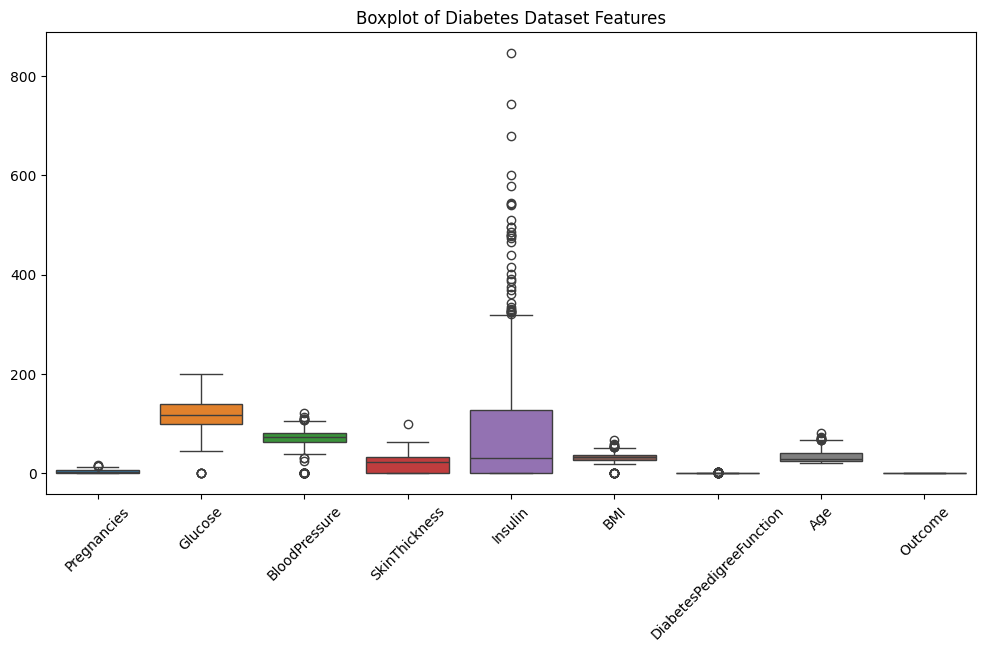

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes)
plt.title("Boxplot of Diabetes Dataset Features")
plt.xticks(rotation=45)
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

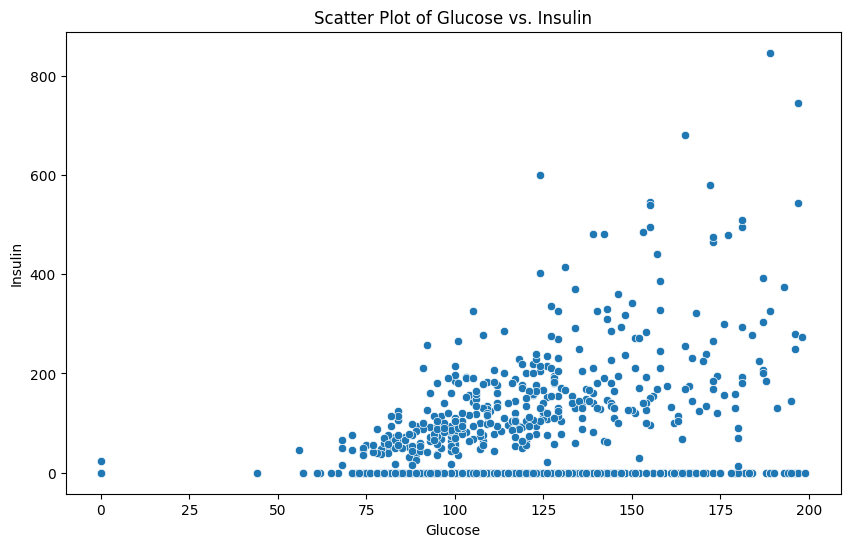

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=diabetes)
plt.title('Scatter Plot of Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [61]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for all numerical features
z_scores = np.abs(zscore(diabetes.select_dtypes(include=np.number)))

# Define threshold (commonly 3)
threshold = 3

# Identify rows with any feature having a Z-score > threshold
outliers = (z_scores > threshold).any(axis=1)

# Number of outliers
print(f"Number of outliers detected: {outliers.sum()}")

# Optionally, view outlier rows
diabetes_outliers = diabetes[outliers]
diabetes_outliers.head()

Number of outliers detected: 80


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [62]:
from scipy.stats import zscore
import numpy as np

# Compute absolute Z-scores for all numeric columns
abs_z_scores = np.abs(zscore(diabetes.select_dtypes(include=np.number)))

# Filter rows where all values have Z-score < 2
filtered_entries_2 = (abs_z_scores < 2).all(axis=1)

# Create the filtered DataFrame
df_z2_filtered = diabetes[filtered_entries_2]

# Show the shape of filtered dataset
print(f"After Z-score > 2 filtering: {df_z2_filtered.shape}")

After Z-score > 2 filtering: (551, 9)


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [63]:
# Step 1: Calculate Q1 and Q3
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [64]:

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_filtered = diabetes[~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)]

print(f"After IQR filtering: {df_iqr_filtered.shape}")

After IQR filtering: (639, 9)


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [65]:
df_iqr_filtered = diabetes[~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)]

print(f"Original data shape: {diabetes.shape}")
print(f"After IQR filtering: {df_iqr_filtered.shape}")

Original data shape: (768, 9)
After IQR filtering: (639, 9)


## Replicability Check

This notebook was tested on Google Colab using the uploaded requirements.txt file.  
All cells executed successfully in a clean environment, confirming that the code and dependencies are reproducible and error-free.

## GitHub Repository Link

This project is version-controlled and hosted in a private GitHub repository.  
Access it here: https://github.com/SHIRU235/Tidying.git
